# Matplotlib - Plotting live data in real-time

## Table of contents

* [Creating the first real-time plot of live data: `plt.plot([x_list], [y_list])` and `FuncAnimation(plt.gcf(), animate, interval=1000)`, where `animate()` is the function run repeatedly to append values to `[x_list]` and `[y_list]`](#Creating-the-first-real-time-plot-of-live-data:-plt.plot([x_list],-[y_list])-and-FuncAnimation(plt.gcf(),-animate,-interval=1000),-where-animate()-is-the-function-run-repeatedly-to-append-values-to-[x_list]-and-[y_list])
* [Let's plot some real world data that is coming from an outside source (a Python script)](#Let's-plot-some-real-world-data-that-is-coming-from-an-outside-source-(a-Python-script))

***

## Creating the first real-time plot of live data: `plt.plot([x_list], [y_list])` and `FuncAnimation(plt.gcf(), animate, interval=1000)`, where `animate()` is the function run repeatedly to append values to `[x_list]` and `[y_list]`

<IPython.core.display.Javascript object>


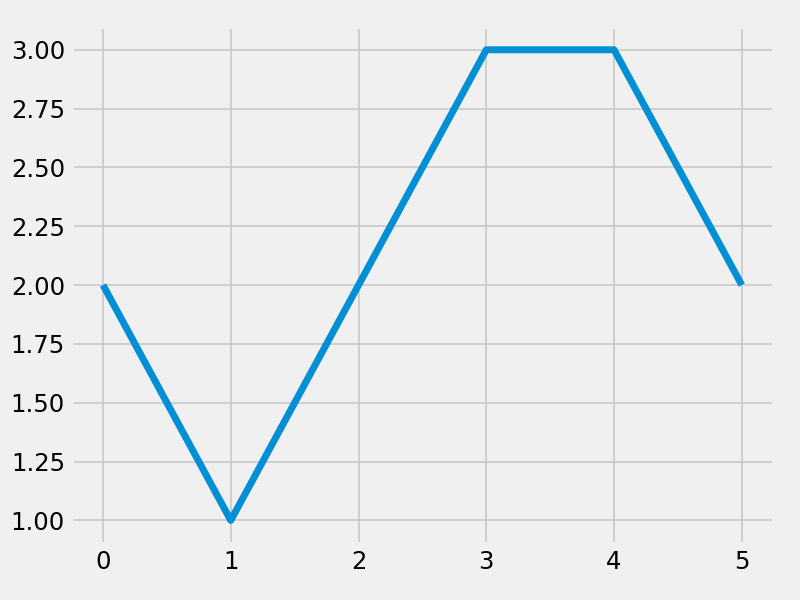

In [23]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt


# Use IPython magic %matplotlib notebook to set the backend to the notebook backend. 
# This will keep the figure alive instead of displaying a static png file and can hence also show animations.
%matplotlib notebook

from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

plt.plot(x_vals, y_vals)

# create itertools.count object
index = count()

# Function to generate x and y values for plotting. Note the use of 'self'.
def animate(self):
    
    # Calculate x and y values
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    # Clear axes (cla) before plotting new line (to avoid different colored lines stacking on top of each other)
    plt.cla()
    
    # Plot
    plt.plot(x_vals, y_vals)

# Create animation on the figure, using the animate() function created above, with an interval of 1000 milliseconds
# The following line will create an object of the 'matplotlib.animation.FuncAnimation' class.
ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()

## Let's plot some real world data that is coming from an outside source (a Python script)

To do this, we are going to plot data from a csv (`data.csv`) that is constantly updated from an outside source.

Note: This outside source is a python script with the name `data_gen.py`. We will run `data_gen.py` script FIRST to start the creation of `data.csv`, and then we will run the cell below to start plotting this constantly updating `data.csv` file.

You could look at the script `data_gen.py` to see how `data.csv` is created, and appended to periodically (every 1 second). 

<IPython.core.display.Javascript object>


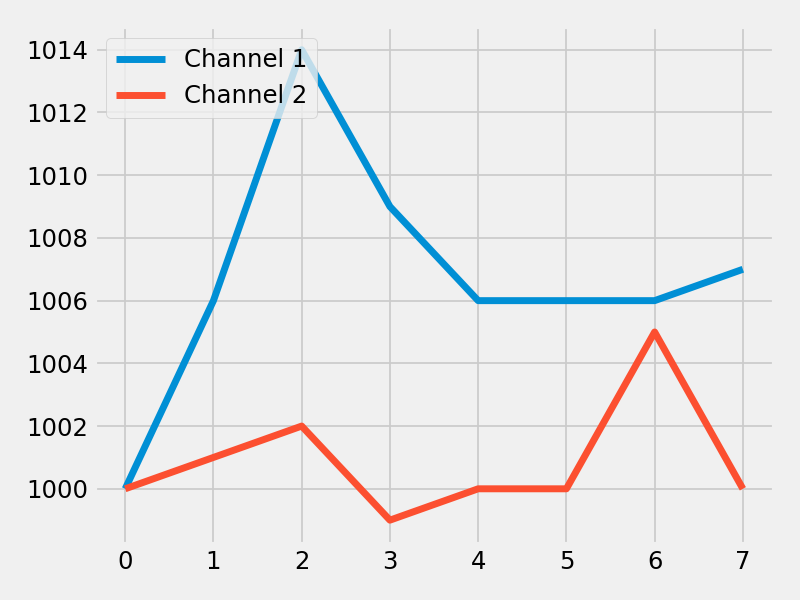

In [21]:
plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

plt.plot(x_vals, y_vals)

# create itertools.count object
index = count()

# Function to be run periodically to read 'data.csv', and plot the x, y1 and y2 values. Note the use of self.
def animate(self):
    
    # Read values from 'data.csv' that is created by repeatedly running the python script called 'data_gen.py'
    data = pd.read_csv('work_directory/matplotlib/code_snippets/09-LiveData/data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']
       
    # Clear axes (cla) before plotting new line (to avoid different colored lines stacking on top of each other)
    plt.cla()
    
    # Plot
    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')
    
    # plt.cla() above will clear the legend too. So we need to add the legend again after plt.cla()
    plt.legend(loc='upper left')
    
    plt.tight_layout()

# Create animation on the figure, using the animate() function created above, with an interval of 1000 milliseconds
# The following line will create an object of the 'matplotlib.animation.FuncAnimation' class.
ani = FuncAnimation(plt.gcf(), animate, interval=1000)
